
## 2.Detection of Parkinson Disease 

In [1]:
!pip install tabulate

In [2]:
# importing all required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.externals import joblib

from IPython.display import display

D:\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


 Data set taken from https://www.kaggle.com/nidaguler/parkinsons-data-set?select=parkinsons.data

In [3]:
# reading data from parkinsons.csv
parkinsons_data = pd.read_csv("parkinsons.csv")

### Data pre-processing

In [4]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
parkinsons_data.shape

(195, 24)

In [6]:
# missing values
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',parkinsons_data.duplicated().sum())

Number of Duplicated Rows : 0


In [10]:
# counting number of 1's and 0's
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [11]:
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [12]:
# dropping name and status column from data set
X = parkinsons_data.drop(columns = ["name","status"],axis=1)
Y = parkinsons_data["status"]

In [13]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [14]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

### Exploring Data Analysis

<AxesSubplot:>

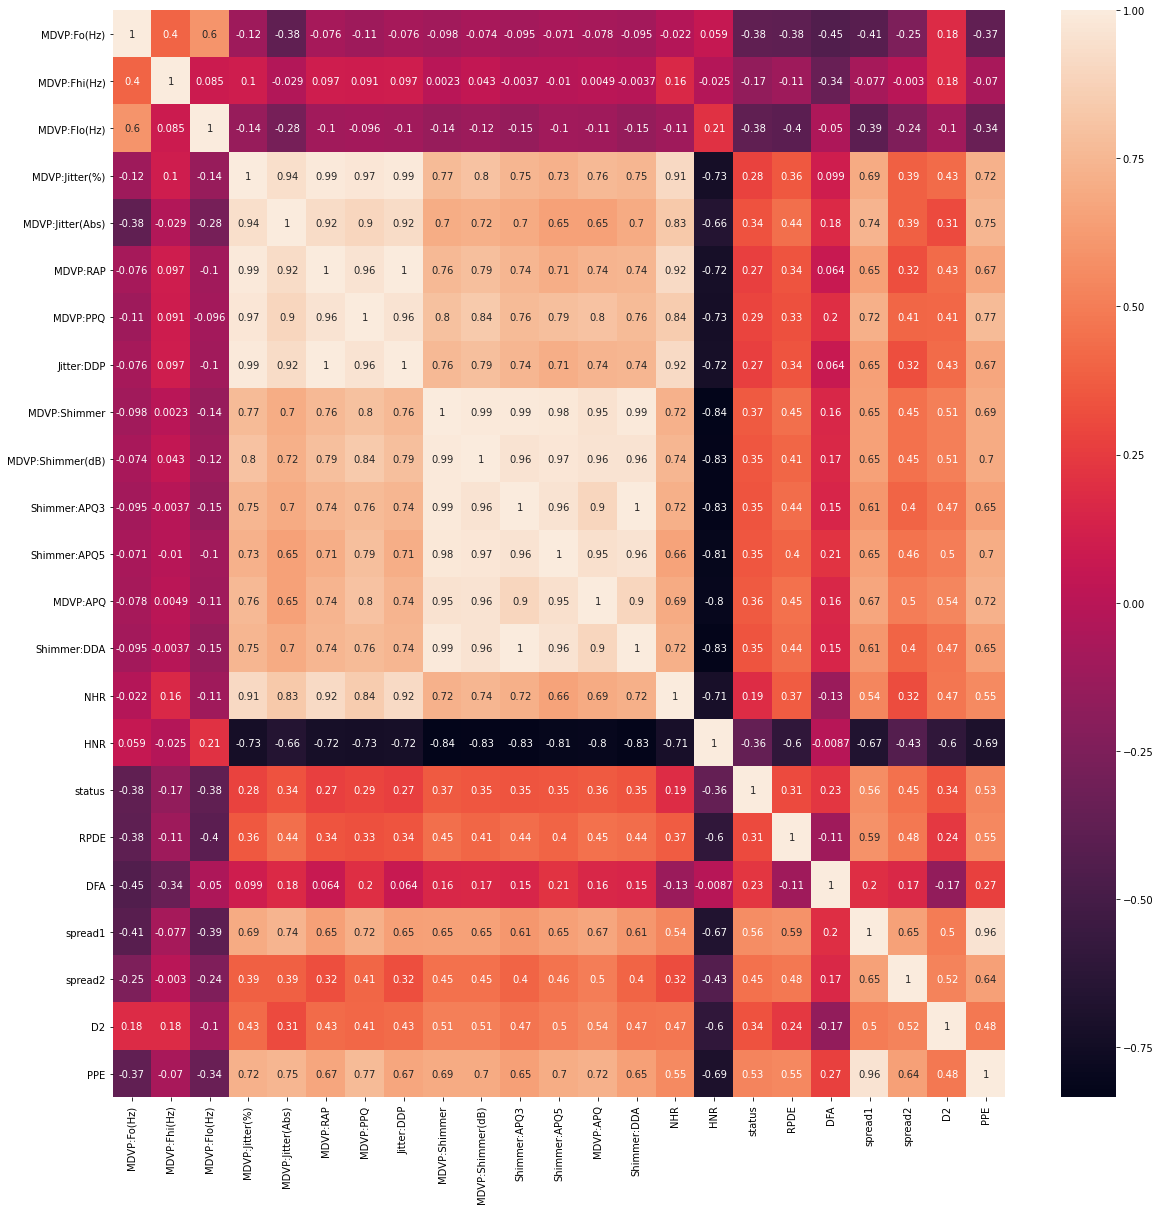

In [15]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(parkinsons_data.corr(),annot=True,ax=ax)

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state =2)


In [17]:
print(X.shape,X_train.shape,X_test.shape)

(195, 22) (156, 22) (39, 22)


In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
# Transforming 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


# Decision Tree

In [22]:
decisiontree_classf = DecisionTreeClassifier()
decisiontree_classf.fit(X_train, Y_train)
predDT = decisiontree_classf.predict(X_test)
print(classification_report(Y_test, predDT))

              precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.96      0.71      0.81        31

    accuracy                           0.74        39
   macro avg       0.70      0.79      0.70        39
weighted avg       0.85      0.74      0.77        39



In [23]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
crossvalidation_decisiontree = GridSearchCV(estimator=decisiontree_classf, param_grid=param_grid, cv= 5)
crossvalidation_decisiontree.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [24]:
crossvalidation_decisiontree.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'random_state': 120}

In [25]:
decisiontree1=DecisionTreeClassifier(random_state=120, max_features='auto', max_depth=3, criterion='gini')
decisiontree1.fit(X_train, Y_train)
predictedDecisiontree= decisiontree1.predict(X_test) 
print(classification_report(Y_test, predDT))

              precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.96      0.71      0.81        31

    accuracy                           0.74        39
   macro avg       0.70      0.79      0.70        39
weighted avg       0.85      0.74      0.77        39



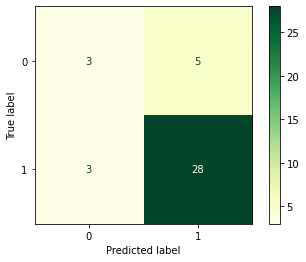

In [26]:
plot_confusion_matrix(decisiontree1, X_test, Y_test, cmap=plt.cm.YlGn) 
plt.show()

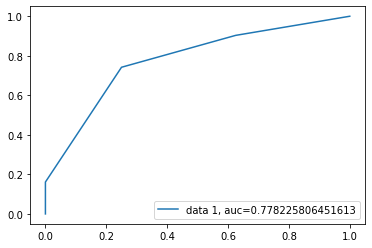

In [27]:
y_pred_proba = decisiontree1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic Regression

In [28]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
predict_model = logistic_model.predict(X_test)

In [29]:
print(classification_report(Y_test, predict_model))
confusion_matrix(Y_test, predict_model)

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



array([[ 5,  3],
       [ 4, 27]], dtype=int64)

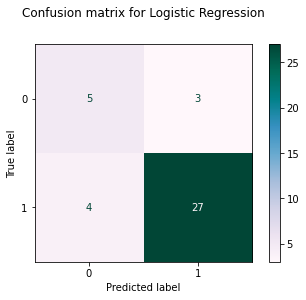

In [30]:
plot_confusion_matrix(logistic_model, X_test, Y_test, cmap=plt.cm.PuBuGn) 
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.show()

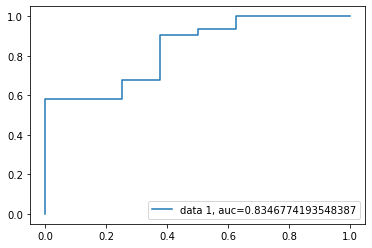

In [31]:
y_predicted_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_predicted_proba)
auc = metrics.roc_auc_score(Y_test, y_predicted_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Naive Bayes

In [32]:
gaussiannb = Naive_Bayes()
gaussiannb.fit(X_train, Y_train)
predicted_gnb = gaussiannb.predict(X_test)

print(classification_report(Y_test, predicted_gnb))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52         8
           1       1.00      0.52      0.68        31

    accuracy                           0.62        39
   macro avg       0.67      0.76      0.60        39
weighted avg       0.87      0.62      0.65        39



In [33]:
# scores -check how efficiently labels are predicted
accuracy_testing = accuracy_score(Y_test, predicted_gnb)
print("Accuracy % :",accuracy_testing*100)

Accuracy % : 61.53846153846154


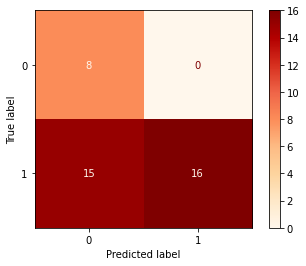

In [34]:
plot_confusion_matrix(gaussiannb, X_test, Y_test, cmap=plt.cm.OrRd) 
plt.show()

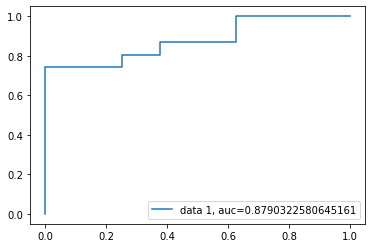

In [35]:
y_pred_proba = gaussiannb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# K- Nearest Neighbour(KNN)

In [36]:
# finding appropriate k
K = 10
max_acc = []
for n in range(2,K):
    
    #Train Model and Predict  
    k_neigh_model = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=k_neigh_model.predict(X_test)
    max_acc.append(metrics.accuracy_score(Y_test, yhat))  
print(max_acc)

[0.7948717948717948, 0.8205128205128205, 0.7435897435897436, 0.7692307692307693, 0.7692307692307693, 0.8717948717948718, 0.8461538461538461, 0.8974358974358975]


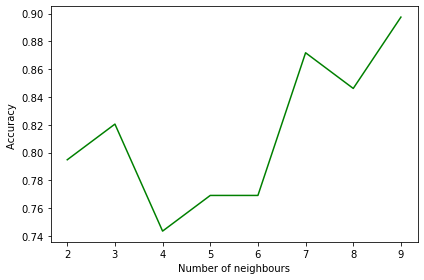

In [37]:
plt.plot(range(2,K),max_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of neighbours')
plt.tight_layout()
plt.show()

In [38]:
# finding k which gives maximum accuracy
k = 0
for i in range(len(max_acc)):
    if max_acc[k]<max_acc[i]:
        k = i
    

In [39]:
knn = KNeighborsClassifier(k)
knn.fit(X_train, Y_train)
predKNN = knn.predict(X_test)

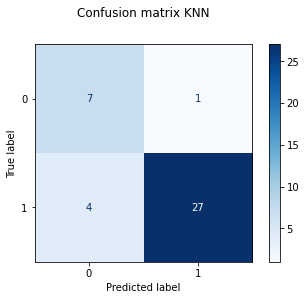

In [40]:
plot_confusion_matrix(knn, X_test, Y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix KNN', y=1.1)
plt.show()

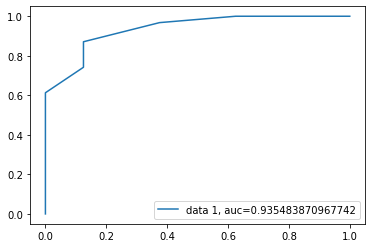

In [41]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Support Vector Machine(SVM)

In [42]:
model = svm.SVC(kernel = 'linear')

In [43]:
# training the svm model with training data
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Accuracy

In [44]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [45]:
print("Accuracy score of training data :", training_data_accuracy)

Accuracy score of training data : 0.8846153846153846


In [46]:
# accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [47]:
print("Accuracy score of test data :", test_data_accuracy)

Accuracy score of test data : 0.8717948717948718


In [48]:
# Building a predictive system
input_data = (91.90400,115.87100,86.29200,0.00540,0.00006,0.00281,0.00336,0.00844,0.02752,0.24900,0.01424,0.01641,0.02214,0.04272,0.01141,21.41400,0.583390,0.792520,-4.960234,0.363566,2.642476,0.275931)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if prediction[0] == 0:
    print("The person doesnot have parkinson disease")
else:
    print("the person  has parkinsons")
    

[1]
the person  has parkinsons


In [49]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3)
grid_SVC.fit(X_train, Y_train)

# print best parameter after tuning 
print("\nBest Parameters: ", grid_SVC.best_params_)

# print how our model looks after hyper-parameter tuning
print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test) 
  
# print classification report 
print("\n", classification_report(Y_test, predSVC))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] ....... C=0.5, gamma=1, kernel=linear, score=0.920, total=   0.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] ....... C=0.5, gamma=1, kernel=linear, score=0.902, total=   0.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] ....... C=0.5, gamma=1, kernel=linear, score=0.939, total=   0.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] ....... C=0.5, gamma=1, kernel=linear, score=0.902, total=   0.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] ....... C=0.5, gamma=1, kernel=linear, score=0.884, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.5, gamma=1, kernel=rbf, score=0.857, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.5, gamma=0.1, kernel=rbf, score=0.885, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.5, gamma=0.1, kernel=rbf, score=0.957, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.5, gamma=0.1, kernel=poly, score=0.923, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.5, gamma=0.1, kernel=poly, score=0.902, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.5, gamma=0.1, kernel=poly, score=0.920, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.5, gamma=0.1, kernel=poly, score=0.902, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.5, gamma=0.1, kernel=poly, score=0.913, total=   0.0s
[CV] C=0.5, gamma=0.01, kernel=linear ................................
[CV] .

[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.884, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.923, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.939, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.957, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.941, total=   0.0s
[CV] C

[CV] .......... C=10, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.909, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.936, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.957, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.909, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.898, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.880, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] .

[CV] ....... C=100, gamma=1, kernel=linear, score=0.917, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.898, total=   0.1s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.917, total=   0.1s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.875, total=   0.1s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.906, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.885, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.917, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.875, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.889, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.880, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.902, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.920, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.902, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.8s finished


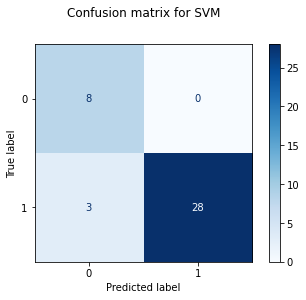

In [50]:
plot_confusion_matrix(grid_SVC, X_test, Y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for SVM', y=1.1)
plt.show()

# Random Forest

In [51]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
predRF = rfc.predict(X_test)

print(classification_report(Y_test, predRF))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.90      0.84      0.87        31

    accuracy                           0.79        39
   macro avg       0.70      0.73      0.71        39
weighted avg       0.82      0.79      0.80        39



In [52]:
param_grid = { 
    'n_estimators': range(100,300,25),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(100,250,50),
    'criterion' :['gini', 'entropy']
}
CV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [53]:
CV_rfc.best_params_

{'random_state': 150,
 'n_estimators': 250,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'gini'}

In [54]:
rfc1=RandomForestClassifier(random_state=200, max_features='auto', n_estimators= 125, max_depth=7, criterion='entropy')
rfc1.fit(X_train, Y_train)
predRFC = rfc1.predict(X_test)
print(classification_report(Y_test, predRFC))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.90      0.90      0.90        31

    accuracy                           0.85        39
   macro avg       0.76      0.76      0.76        39
weighted avg       0.85      0.85      0.85        39



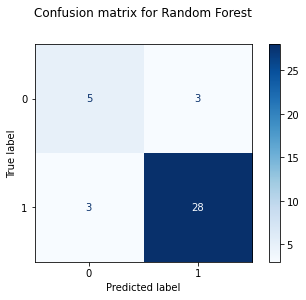

In [55]:
plot_confusion_matrix(rfc1, X_test, Y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.show()

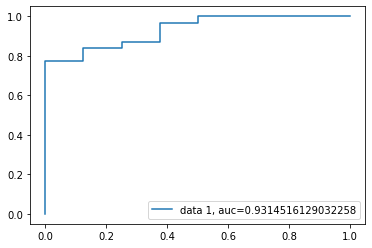

In [56]:
y_pred_proba = rfc1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [58]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

table = [
            ["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
            [accuracy_score(Y_test, predictedDecisiontree), f1_score(Y_test, predictedDecisiontree), recall_score(Y_test, predictedDecisiontree), precision_score(Y_test,predictedDecisiontree), r2_score(Y_test, predictedDecisiontree)],
            [accuracy_score(Y_test, predRFC), f1_score(Y_test, predRFC), recall_score(Y_test, predRFC), precision_score(Y_test, predRFC), r2_score(Y_test, predRFC)],
            [accuracy_score(Y_test, predict_model), f1_score(Y_test, predict_model), recall_score(Y_test, predict_model), precision_score(Y_test, predict_model), r2_score(Y_test, predict_model)],
            [accuracy_score(Y_test, predSVC), f1_score(Y_test, predSVC), recall_score(Y_test, predSVC), precision_score(Y_test, predSVC), r2_score(Y_test, predSVC)],
            [accuracy_score(Y_test, predicted_gnb), f1_score(Y_test, predicted_gnb), recall_score(Y_test, predicted_gnb), precision_score(Y_test, predicted_gnb), r2_score(Y_test, predicted_gnb)],
            [accuracy_score(Y_test, predKNN), f1_score(Y_test, predKNN), recall_score(Y_test, predKNN), precision_score(Y_test, predKNN), r2_score(Y_test, predKNN)],
]


In [60]:
print(tabulate(table,headers = ["Decisiontree","Random_forest","LogisticRegression","SVM","naive bayes","KNN"]))

Decisiontree        Random_forest       LogisticRegression    SVM                 naive bayes
------------------  ------------------  --------------------  ------------------  --------------------
Accuracy            F1-Score            Recall                Precision           R2-Score
0.7948717948717948  0.875               0.9032258064516129    0.8484848484848485  -0.25806451612903225
0.8461538461538461  0.9032258064516129  0.9032258064516129    0.9032258064516129  0.056451612903225756
0.8205128205128205  0.8852459016393444  0.8709677419354839    0.9                 -0.10080645161290325
0.9230769230769231  0.9491525423728813  0.9032258064516129    1.0                 0.5282258064516129
0.6153846153846154  0.6808510638297872  0.5161290322580645    1.0                 -1.3588709677419355
0.8717948717948718  0.9152542372881356  0.8709677419354839    0.9642857142857143  0.21370967741935476
